<a href="https://colab.research.google.com/github/Aniruddh-11-stack/Tweet-Emotion-Recognition-Natural-Language-Processing-with-TensorFlow/blob/main/Tweet_Emotion_Recognition_Natural_Language_Processing_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Names of Group Members:


1.   Dharmik Shetty - I073
2.   Manan Shah - I075
3.   Aniruddh Kulkarni - I081





# Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)



## Task 1: Introduction

In [ ]:
pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 10.2 MB/s 
     |████████████████████████████████| 212 kB 31.4 MB/s 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [ ]:


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
dataset=nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train=dataset['train']
val=dataset['validation']
test=dataset['test']

In [ ]:
type(train)

nlp.arrow_dataset.Dataset

In [ ]:
def get_tweet(data):
  tweets=[x['text'] for x in data]
  labels=[x['label'] for x in data]
  return tweets,labels

In [ ]:
tweets,labels=get_tweet(train)

In [ ]:
tweets[90],labels[90]

('i was ready to meet mom in the airport and feel her ever supportive arms around me',
 'love')

In [ ]:
tweets[46],labels[46]

('i lost my special mind but don t worry i m still sane i just wanted you to feel what i felt while reading this book i don t know how many times it was said that sam was special but i can guarantee you it was many more times than what i used in that paragraph did i tell you she was special',
 'joy')

In [ ]:
tweets[5],labels[5]

('ive been feeling a little burdened lately wasnt sure why that was',
 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[5]])

[[73, 48, 8, 7, 56, 521, 319, 328, 158, 161, 9, 20]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

<function matplotlib.pyplot.show(*args, **kw)>

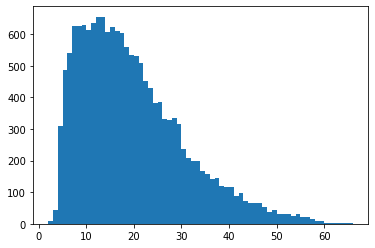

In [ ]:
lengths=[len(t.split(' ')) for t in tweets]
plt.hist(lengths,bins=len(set(lengths)))
plt.show

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen=50

In [ ]:
def get_sequences(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences,truncating='post',padding='post',maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq=get_sequences(tokenizer,tweets)

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
classes=set(labels)
print(classes)

{'surprise', 'love', 'joy', 'anger', 'sadness', 'fear'}


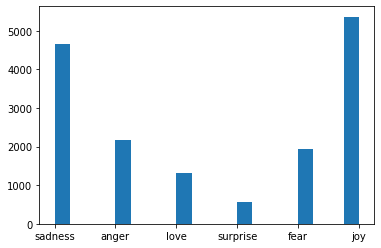

In [ ]:
plt.hist(labels,bins=20)
plt.show()

In [ ]:
class_to_index=dict((c,i) for i,c in enumerate(classes))
index_to_class=dict((v,k) for k,v in class_to_index.items())

In [ ]:
class_to_index

{'surprise': 0, 'love': 1, 'joy': 2, 'anger': 3, 'sadness': 4, 'fear': 5}

In [ ]:
class_to_index.items()

dict_items([('surprise', 0), ('love', 1), ('joy', 2), ('anger', 3), ('sadness', 4), ('fear', 5)])

In [ ]:
index_to_class

{0: 'surprise', 1: 'love', 2: 'joy', 3: 'anger', 4: 'sadness', 5: 'fear'}

In [ ]:
names_to_ids= lambda labels:np.array([class_to_index.get(x) for x in labels])

In [ ]:
names_to_ids

<function __main__.<lambda>(labels)>

In [ ]:
np.array([class_to_index.get(x) for x in labels])

array([4, 4, 3, ..., 2, 3, 4])

In [ ]:
train_labels=names_to_ids(labels)
len(train_labels)

16000

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Embedding(10000,16,input_length=maxlen),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
      tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets,val_labels=get_tweet(val)
val_seq=get_sequences(tokenizer,val_tweets)
val_labels=names_to_ids(val_labels)

In [ ]:
val_tweets[0],val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 4)

In [ ]:
h=model.fit(
    padded_train_seq,train_labels,
    validation_data=(val_seq,val_labels),
    epochs=20
)

Epoch 1/20
500/500 [==============================] - 17s 16ms/step - loss: 1.3670 - accuracy: 0.4465 - val_loss: 1.0096 - val_accuracy: 0.6155
Epoch 2/20
500/500 [==============================] - 7s 13ms/step - loss: 0.6702 - accuracy: 0.7656 - val_loss: 0.6076 - val_accuracy: 0.7985
Epoch 3/20
500/500 [==============================] - 7s 13ms/step - loss: 0.3643 - accuracy: 0.8811 - val_loss: 0.4819 - val_accuracy: 0.8500
Epoch 4/20
500/500 [==============================] - 7s 13ms/step - loss: 0.2373 - accuracy: 0.9268 - val_loss: 0.4375 - val_accuracy: 0.8760
Epoch 5/20
500/500 [==============================] - 7s 13ms/step - loss: 0.1799 - accuracy: 0.9438 - val_loss: 0.4374 - val_accuracy: 0.8680
Epoch 6/20
500/500 [==============================] - 7s 13ms/step - loss: 0.1411 - accuracy: 0.9579 - val_loss: 0.4656 - val_accuracy: 0.8720
Epoch 7/20
500/500 [==============================] - 7s 13ms/step - loss: 0.1246 - accuracy: 0.9617 - val_loss: 0.4197 - val_accuracy: 0.868

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

In [ ]:
test_tweets,test_labels=get_tweet(test)
test_seq=get_sequences(tokenizer,test_tweets)
test_labels=names_to_ids(test_labels)

In [ ]:
_=model.evaluate(test_seq,test_labels)

63/63 [==============================] - 1s 11ms/step - loss: 0.5596 - accuracy: 0.8725


##Prediction Model

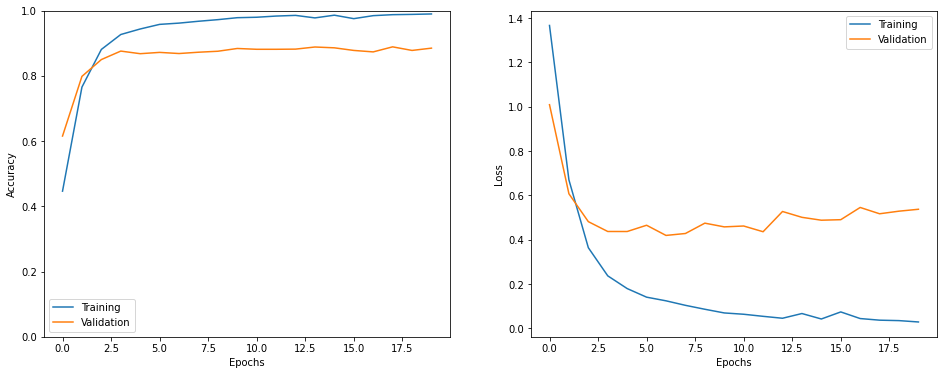

None


In [ ]:
print(show_history(h))

In [ ]:
i=random.randint(0,len(test_tweets)-1)
print('Sentence:',test_tweets[i])
print('Emotion',index_to_class[test_labels[i]])

p=model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred_class=index_to_class[np.argmax(p).astype('uint8')]

Sentence: i do think gt that for those who desire privacy and the camp out feel they would be gt terrific
Emotion joy
1/1 [==============================] - 3s 3s/step


In [ ]:
predsy=model.predict(test_seq)
preds=np.argmax(predsy,axis=1)

63/63 [==============================] - 1s 10ms/step


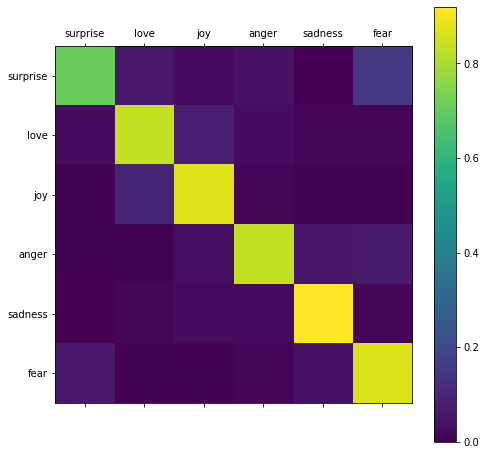

In [ ]:
show_confusion_matrix(test_labels,preds,list(classes))

In [ ]:
j=random.randint(0,len(test_tweets)-1)
print('Sentence:',test_tweets[j])
print('Emotion',index_to_class[test_labels[j]])

q=model.predict(np.expand_dims(test_seq[j],axis=0))[0]
pred_class=index_to_class[np.argmax(q).astype('uint8')]

Sentence: i know some people are more fond of the treat of going and getting a pedicure because you can just sit there and enjoy the wonderful feeling of someone else massaging your tender tootsies all the while flipping the pages of a book or magazine
Emotion love
1/1 [==============================] - 0s 39ms/step


In [ ]:
predsy2=model.predict(test_seq)
preds2=np.argmax(predsy2,axis=1)

63/63 [==============================] - 1s 9ms/step


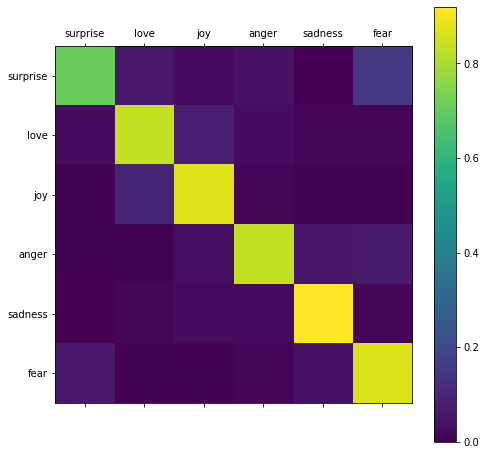

In [ ]:
show_confusion_matrix(test_labels,preds2,list(classes))